# Smart Hotels: Making a Difference in the Hospitality Industry?

In [19]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



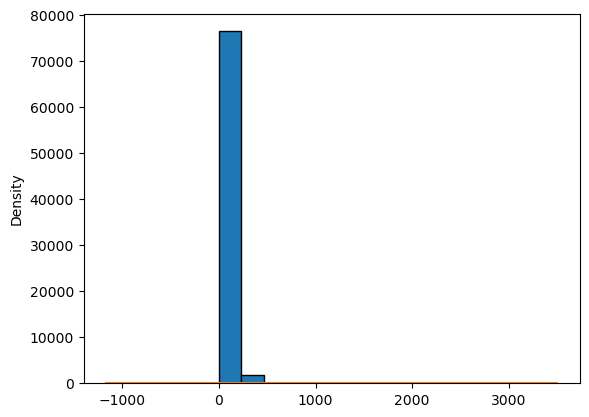

In [20]:
data= pd.read_excel("Consolidated_dataset_CBRE.xlsx")
data

data['RevPar'].plot(kind='hist', edgecolor='black')

data['RevPar'].plot(kind='kde')

data['RevPar'].describe()

data['RevPar_level'] = pd.qcut(data['RevPar'],
                           q=[0, .2, .4, .6, .8, 1],
                           labels=[1, 2, 3, 4, 5])

data['ITSpend'] = pd.qcut(data['ITTotalExpense'],
                           q=[0, 0.9, 1],
                           labels=[0,1])
data['Ratio_ITSpend'] = data['ITTotalExpense'] / data['TotalNonOperatingIncomeExpenses']
#view updated DataFrame
#data['ITTotalExpense'].describe()
#data[['UtilElectricity','MarketName','ChainSegment','RevPar_level','ITSpend','RmsRevenue','CancellationAttritionPenalties','ADR','Occupancy']].describe(include="all")
#print(data)


## Hypothesis 1: By measuring total IT expenditure over total expenditure, higher rate of IT expenditure will lead to a better financial performance (RevPAR)

The rev par is higher for a smart hotel, about 12 points higher than non-smart hotel


In [21]:


data['Ratio_ITSpend'].describe()

data['Smart_hotel_indicator'] = pd.qcut(data['Ratio_ITSpend'],
                           q=[0, 0.8, 1],
                           labels=[0,1])

print(data)

#data.to_csv('output.csv', index=False)

data['RevPar'].mean()

data.groupby(['Smart_hotel_indicator']).agg({'RevPar': 'mean'})

data.groupby(['Smart_hotel_indicator']).describe()['RevPar']

       Year of Data  PropertyID             City State      Zip  YearOpened  \
0              2007         101          Atlanta    GA  30326.0      1974.0   
1              2007         111          Atlanta    GA  30344.0      1973.0   
2              2007         118        Arlington    VA  22202.0      1972.0   
3              2007         123     Gaithersburg    MD  20879.0      1971.0   
4              2007         124           Denver    CO  80207.0      1973.0   
...             ...         ...              ...   ...      ...         ...   
78533          2021      103155         New York    NY  10036.0      1990.0   
78534          2021      103156      Miami Beach    FL  33140.0         NaN   
78535          2021      103180        Brunswick    GA  31525.0         NaN   
78536          2021      103187        Las Vegas    NV  89169.0         NaN   
78537          2021      103188  Fort Lauderdale    FL  33301.0         NaN   

       Rooms  Occupancy       ADR      RevPar  ... 

,count,mean,std,min,25%,50%,75%,max
Smart_hotel_indicator,,,,,,,,
0,62814.0,85.388152,58.903258,0.384034,49.618879,74.039206,101.993487,2333.628584
1,15704.0,97.735192,67.683222,1.795991,58.380583,82.860461,115.052799,1644.715541



# Hypothesis 1b: Higher rate of IT expenditure will lead to higher room revenue caused by higher occupancy rate, ceteris paribus

The occupany rates are the same, the RmsRevenue is higher because the expenditure is lower


In [22]:
print(data.groupby(['Smart_hotel_indicator']).describe()['Occupancy'])

data.groupby(['Smart_hotel_indicator']).describe()['RmsRevenue']

                         count      mean       std  min       25%       50%  \
Smart_hotel_indicator                                                         
0                      62814.0  0.685449  0.140467  0.0  0.617587  0.708634   
1                      15704.0  0.684203  0.147490  0.0  0.618271  0.715112   

                            75%       max  
Smart_hotel_indicator                      
0                      0.781353  1.137637  
1                      0.785717  1.000000  


,count,mean,std,min,25%,50%,75%,max
Smart_hotel_indicator,,,,,,,,
0,62814.0,6.739953e+06,1.132218e+07,16260.0,2030572.95,3500279.000,6.643640e+06,2.530229e+08
1,15704.0,9.195254e+06,1.403271e+07,54005.0,2352136.66,4102650.805,1.086917e+07,2.597118e+08


# Hypothesis 1c: Higher rate of IT expenditure will lead to higher average daily rate (ADR), ceteris paribus

ADR is higher by about 11 points when compared with a non-smart hotel

In [23]:
data.groupby(['Smart_hotel_indicator']).describe()['ADR']

,count,mean,std,min,25%,50%,75%,max
Smart_hotel_indicator,,,,,,,,
0,62814.0,123.632561,79.710844,0.0,82.342975,110.0463,141.666525,3266.8413
1,15704.0,142.210351,95.675766,0.0,95.910075,119.8311,162.326200,2441.4513


# Hypothesis 1d: Higher rate of IT expenditure will lead to better web marketing performance, ceteris paribus

Not sure about this item

In [25]:
data.groupby(['Smart_hotel_indicator']).describe()['MktingAdvertising']

,count,mean,std,min,25%,50%,75%,max
Smart_hotel_indicator,,,,,,,,
0,62814.0,27310.487807,85097.897956,-167303.26,338.010,4469.230,26824.7500,3695240.0
1,15704.0,34665.244973,95627.507669,-123416.16,559.235,6797.115,32523.1825,4356875.0


## Geographical location and chain segments will moderate the relationship between IT expenditure and financial performance of the smart hotels, ceteris paribus


In [27]:
hotel_data_onehot = data.copy()

hotel_data_onehot

hotel_data_onehot['City'] = hotel_data_onehot['City'].astype('category')  
hotel_data_onehot['City'] = hotel_data_onehot['City'].cat.codes
hotel_data_onehot



hotel_data_onehot['MarketName'] = hotel_data_onehot['MarketName'].astype('category')  
hotel_data_onehot['MarketName'] = hotel_data_onehot['MarketName'].cat.codes
hotel_data_onehot

hotel_data_onehot['ChainSegment'] = hotel_data_onehot['ChainSegment'].astype('category')  
hotel_data_onehot['ChainSegment'] = hotel_data_onehot['ChainSegment'].cat.codes
hotel_data_onehot

hotel_data_onehot['Location'] = hotel_data_onehot['Location'].astype('category')  
hotel_data_onehot['Location'] = hotel_data_onehot['Location'].cat.codes
hotel_data_onehot



0        5
1        5
2        3
3        3
4        5
        ..
78533    4
78534    4
78535    3
78536    3
78537    2
Name: ChainSegment, Length: 78538, dtype: int8

In [33]:
data.groupby(['Smart_hotel_indicator','ChainSegment']).agg({'RevPar': 'mean'})

data.groupby(['Smart_hotel_indicator','Location']).agg({'RevPar': 'mean'})


RevPar
Smart_hotel_indicator Location                                      
0                     Large Metropolitan Area - Airport    74.896359
                      Large Metropolitan Area - Suburban   70.319171
                      Large Metropolitan Area - Urban     126.999695
                      Mid-sized City - Airport             65.176155
                      Mid-sized City - Suburban            64.339404
                      Mid-sized City - Urban               73.913083
                      Resort / Destination                116.085742
                      Rural Area / Interstate              80.203359
                      Small City / Town                    68.664512
1                     Large Metropolitan Area - Airport    86.385090
                      Large Metropolitan Area - Suburban   80.831933
                      Large Metropolitan Area - Urban     133.665638
                      Mid-sized City - Airport             65.061825
                      Mid-sized City - Suburban            71.991863
                      Mid-sized City - Urban               77.203355
                      Resort / Destination                147.250587
                      Rural Area / Interstate              86.525462
                      Small City / Town                    75.292876

## Hypothesis 3: Higher IT labor costs smart hotels to have higher RevPAR, ceteris paribus.


In [36]:
data['Ratio_ITLabour'] = data['ITTotalLabor'] / data['ITTotalExpense']

data['HighITLabourInd'] = pd.qcut(data['Ratio_ITLabour'],
                           q=[0, 0.8, 1],
                           labels=[0,1])

data.groupby(['Smart_hotel_indicator','HighITLabourInd']).describe()['RevPar']

count        mean        std  \
Smart_hotel_indicator HighITLabourInd                                   
0                     0                50747.0   75.572823  43.311404   
                      1                 9646.0  136.352463  93.629017   
1                     0                10130.0   76.377750  39.950603   
                      1                 5574.0  136.549488  87.584905   

                                            min        25%         50%  \
Smart_hotel_indicator HighITLabourInd                                    
0                     0                0.384034  46.444150   68.897484   
                      1                6.105874  80.603962  112.372298   
1                     0                1.795991  50.272103   71.239563   
                      1                3.280477  84.618858  115.961505   

                                              75%          max  
Smart_hotel_indicator HighITLabourInd                           
0                     0                 93.490062  2333.628584  
                      1                163.369202  1431.851976  
1                     0                 91.860943   796.854497  
                      1                164.558647  1644.715541

## Hypothesis 4: Higher IT maintenance costs help smart hotels to have higher RevPAR, ceteris paribus.

In [42]:
data['Ratio_ITLabour'] = data['ITTotalLabor'] / data['ITTotalExpense']

data['HighITLabourInd'] = pd.qcut(data['Ratio_ITLabour'],
                           q=[0, 0.8, 1],
                           labels=[0,1])

data['Ratio_ITManagement'] = data['ITManagement'] / data['ITTotalExpense']

data['HighITManagementInd'] = pd.qcut(data['Ratio_ITManagement'],
                           q=[0, 0.8, 1],
                           labels=[0,1])
#ITNonManagement	ITManagement	ITServiceChargeDistribution	ITContractLeasedOutsourceLabor	ITBonusIncentive	ITUnassignedLabor	ITSandW	ITBenefits	ITTotalLabor
data.groupby(['Smart_hotel_indicator']).describe()['ITNonManagement']
data.groupby(['Smart_hotel_indicator','HighITLabourInd','HighITManagementInd']).describe()['RevPar']

count  \
Smart_hotel_indicator HighITLabourInd HighITManagementInd            
0                     0               0                    50078.0   
                                      1                      669.0   
                      1               0                     8408.0   
                                      1                     1238.0   
1                     0               0                     9938.0   
                                      1                      192.0   
                      1               0                     4505.0   
                                      1                     1069.0   

                                                                 mean  \
Smart_hotel_indicator HighITLabourInd HighITManagementInd               
0                     0               0                     75.652822   
                                      1                     69.584462   
                      1               0                    131.568907   
                                      1                    168.840462   
1                     0               0                     76.472724   
                                      1                     71.461866   
                      1               0                    128.268972   
                                      1                    171.445396   

                                                                  std  \
Smart_hotel_indicator HighITLabourInd HighITManagementInd               
0                     0               0                     43.454519   
                                      1                     30.189500   
                      1               0                     85.908913   
                                      1                    130.313537   
1                     0               0                     40.101981   
                                      1                     30.808817   
                      1               0                     76.109759   
                                      1                    118.709452   

                                                                 min  \
Smart_hotel_indicator HighITLabourInd HighITManagementInd              
0                     0               0                     0.384034   
                                      1                    19.895255   
                      1               0                     6.105874   
                                      1                     8.908253   
1                     0               0                     1.795991   
                                      1                    19.028711   
                      1               0                     3.280477   
                                      1                     8.037585   

                                                                  25%  \
Smart_hotel_indicator HighITLabourInd HighITManagementInd               
0                     0               0                     46.389666   
                                      1                     48.954665   
                      1               0                     80.267346   
                                      1                     86.145524   
1                     0               0                     50.276916   
                                      1                     49.941186   
                      1               0                     82.833089   
                                      1                    105.847817   

                                                                  50%  \
Smart_hotel_indicator HighITLabourInd HighITManagementInd               
0                     0               0                     68.988441   
                                      1                     62.835120   
                      1               0                    109.536169   
                                      1                    140.502784   
1       